## 알파벳 별로 CSV 파일 생성
- EMNIST letters 데이터셋 사용
- 개별적인 학습을 위해 a, b, c 등 각 알파벳 별로 csv 파일 구분
- 글자 좌우 이동, 회전을 시켜 데이터 증폭

In [ ]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.transform import rotate, AffineTransform, warp

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# emnist-letters-train.csv 파일 이용해서 알파벳 별로 csv 파일 생성
data = pd.read_csv('/content/gdrive/My Drive/emnist-letters-train.csv')
train_images = data[data['23']==1]
train_images = train_images.drop(['23'], axis=1)
train_images

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,9,37,32,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 이미지 사이즈 28*28 pixel
width, height, channel = 28, 28, 1

train_images = train_images.values
train_images = train_images.reshape((train_images.shape[0], width, height, channel)).astype('float32')

print(train_images.shape)

(3396, 28, 28, 1)


In [ ]:
# 이미지 픽셀값 normalization
train_images = -(train_images - 127.5) / 127.5 

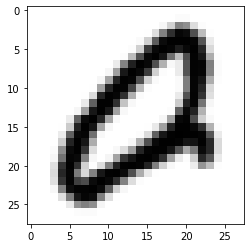

In [ ]:
plt.imshow(train_images[0].reshape(width, height), cmap='gray')

In [ ]:
# 좌우 이동, 회전된 이미지를 추가해서 데이터 증폭
data = []
for image in train_images:
    image = np.transpose(image.reshape(width, height))
    data.append(np.ravel(image, order='C'))

    left_image = rotate(image, angle=15, cval=1)
    data.append(np.ravel(left_image, order='C'))

    right_image = rotate(image, angle=-15, cval=1)
    data.append(np.ravel(right_image, order='C'))

    hori_transform = AffineTransform(translation=(27,0))
    warp_r_image = warp(image, hori_transform, mode="wrap")
    data.append(np.ravel(warp_r_image, order='C'))

    verti_transform = AffineTransform(translation=(0,27))  
    warp_l_image = warp(image, verti_transform, mode="wrap")
    data.append(np.ravel(warp_l_image, order='C'))

len(data)

16980

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# csv 파일 생성
df.to_csv("/content/gdrive/My Drive/alphabet-csv/alphabet-a-data.csv")